In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

In [5]:
print(df.head())
print(df.info())
print(df.describe())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United S

In [6]:
df = df.dropna(subset=['price'])  # remove rows with missing price
df = df[df['price'] > 0]          # remove zero-priced listings

In [8]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
print("✅ Columns loaded successfully:\n", df.columns)

✅ Columns loaded successfully:
 Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')


In [11]:
print("\n🔹 Basic Info:")
print(df.info())
print("\n🔹 Summary Stats:")
print(df.describe())


🔹 Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 102352 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102352 non-null  int64         
 1   name                            102085 non-null  object        
 2   host_id                         102352 non-null  int64         
 3   host_identity_verified          102067 non-null  object        
 4   host_name                       101949 non-null  object        
 5   neighbourhood_group             102324 non-null  object        
 6   neighbourhood                   102337 non-null  object        
 7   lat                             102344 non-null  float64       
 8   long                            102344 non-null  float64       
 9   country                         101825 non-null  object        
 10  country_code                    102226 non-nul

In [12]:
df = df.dropna(subset=['price'])
df = df[df['price'] > 0]

In [13]:
avg_price_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
print("\n💰 Average price by room type:\n", avg_price_room)


💰 Average price by room type:
 room_type
Hotel room         668.465517
Shared room        634.132101
Entire home/apt    625.082232
Private room       625.007363
Name: price, dtype: float64


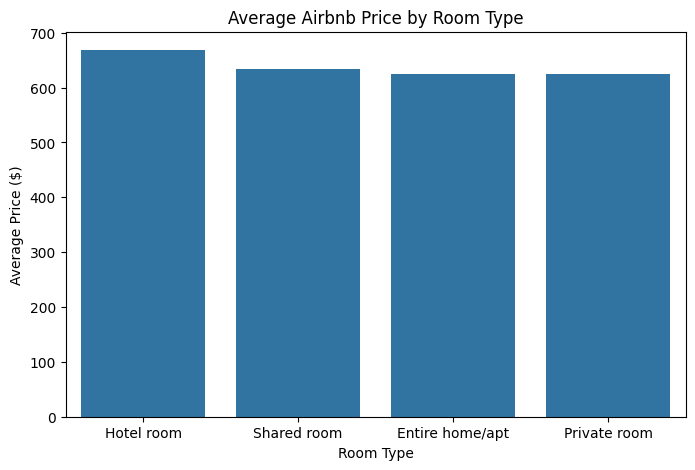

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_room.index, y=avg_price_room.values)
plt.title("Average Airbnb Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.show()


🏙️ Top 10 neighbourhoods by number of listings:
 neighbourhood
Bedford-Stuyvesant    7921
Williamsburg          7756
Harlem                5456
Bushwick              4966
Hell's Kitchen        3961
Upper West Side       3853
Upper East Side       3668
East Village          3474
Midtown               3380
Crown Heights         3252
Name: count, dtype: int64


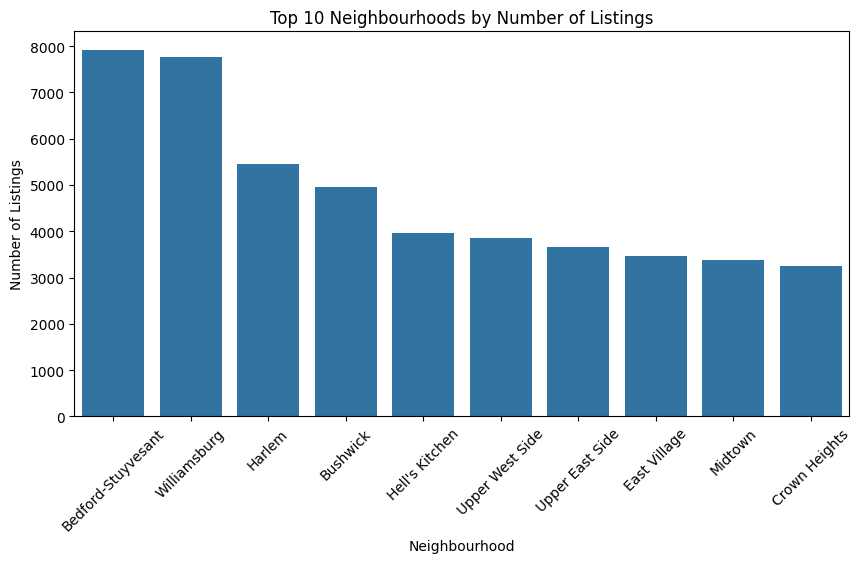

In [ ]:
#Analysis 2 - Top 10 Neighbourhoods by Listings
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
print("\n🏙️ Top 10 neighbourhoods by number of listings:\n", top_neighbourhoods)

plt.figure(figsize=(10,5))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values)
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

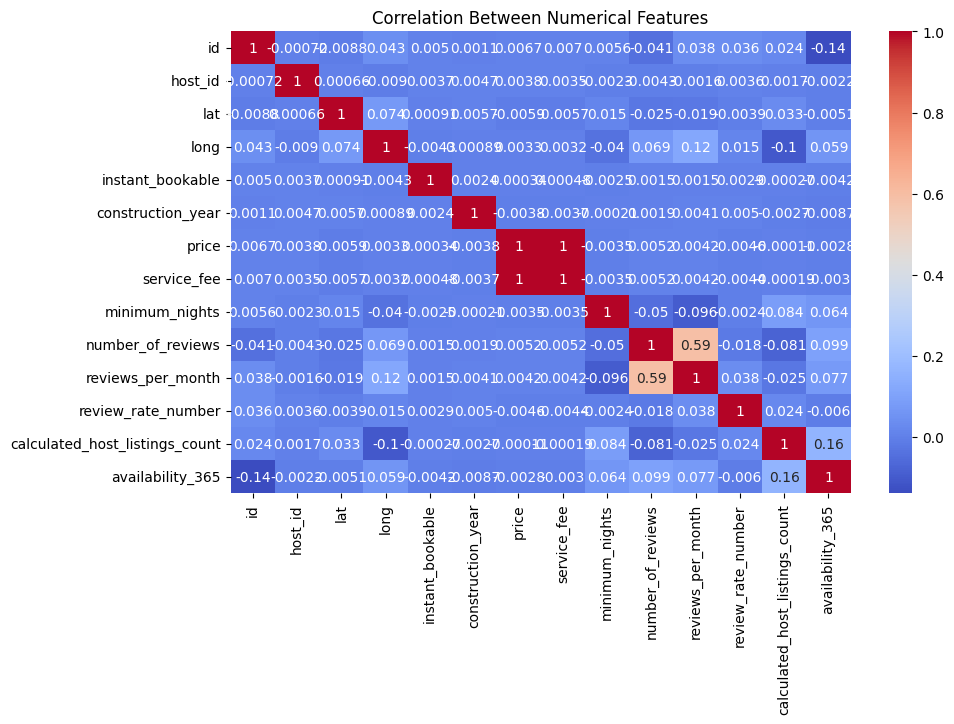

In [ ]:
#Analysis 3 - Correlation Heatmap (numerical columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

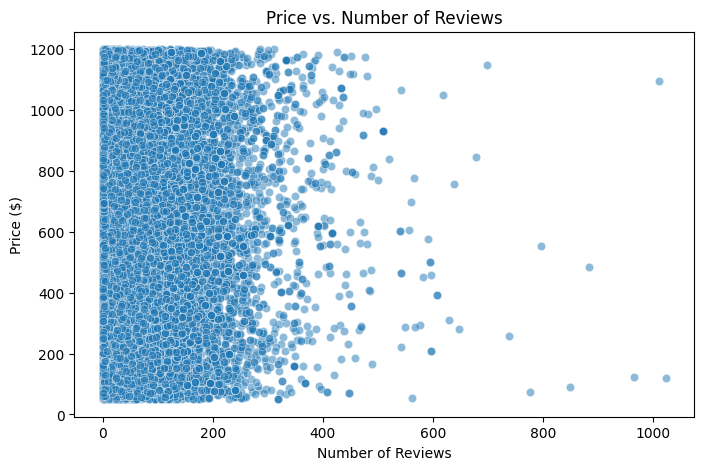

In [ ]:
#Analysis 4 - Price vs. Number of Reviews
plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.show()

In [ ]:
#Step 10: Summary
print("\n📊 Summary Insights:")
print("➡️ Average Price:", round(df['price'].mean(), 2))
print("➡️ Most Common Room Type:", df['room_type'].mode()[0])
print("➡️ Total Listings:", len(df))
print("➡️ Average Review Score:", round(df['review_rate_number'].mean(), 2))


📊 Summary Insights:
➡️ Average Price: 625.29
➡️ Most Common Room Type: Entire home/apt
➡️ Total Listings: 102352
➡️ Average Review Score: 3.28
